**Installing Packages**



In [ ]:
pip install emoji

     |████████████████████████████████| 175 kB 23.6 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=8656fb09f35f242c499093392f6604f49fa65fa10e1257d97875d873bd17a9c5
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
pip install wordcloud


In [ ]:
pip install jovian

     |████████████████████████████████| 68 kB 5.2 MB/s 
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6503 sha256=16d718db9e249272ee80767a47c160398260b30c75c73bd591a5594a348bccdc
  Stored in directory: /root/.cache/pip/wheels/2a/ea/87/dd57f1ecb4f0752f3e1dbf958ebf8b36d920d190425bcdc24d
Successfully built uuid


**Importing Libraries**

In [ ]:
import re
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborn
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter

**Data Preproccessing**

**Data Preproccessing**


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
def rawToDf(file, key):
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)

    return df

**Import Data**

In [ ]:
df = rawToDf('WhatsApp Chat with Actuarial Class Of 2021.txt', '24hr')

In [ ]:
df.head()

,date_time,user,msg
0,2021-07-28 19:14:00,grp_notif,"Group creator created group ""Bsc.Actuarial Sci..."
1,2021-07-28 19:14:00,grp_notif,You were added
2,2021-09-30 08:44:00,joseh Jayy,Saa ngapi
3,2021-09-30 08:20:00,Matata,Jioni tko na Daru ya Magero
4,2021-09-30 08:20:00,Matata,Physical


In [ ]:
df.shape

(7023, 3)

In [ ]:
me="Wamuyu Gathigia"

**Data Cleaning**

In [ ]:
images = df[df['msg']=="<Media omitted>"]#no of images,images are presented 

In [ ]:
images.shape

(0, 3)

In [ ]:
df['user'].unique()

array(['grp_notif', 'joseh Jayy', 'Matata', 'Maggie', '+254 100778928',
       '+254 714 571846', '+254 700 764216', 'Kiprotich',
       '+254 710 480006', '+254 748 928337', 'Phee', 'Coùprere',
       '+254 759 645300', '+254 705 642197', '+254 799 318462',
       '+254 725 069522', 'Cele', 'Delvo', '+254 708 399509', 'Victor',
       'Musa', 'Lorine', 'Wamuyu  Gathigia', 'Reuben', '+254 746 057988',
       'Joy Act', 'Irene Actuarial', '+254 743 445124', '+254 741 691018',
       'Phiny', 'Bonnieh Act', 'Adulla', 'Susan', 'Nyauma Maoga',
       'Chumba', '+254 740 451342', 'joram', 'Ja Siaya',
       '+254 704 826829', '+254 705 653427', 'Paula Act',
       '+254 792 134611', '+254 741 855939', 'Davy', '+254 734 976690',
       'Lyn ACT', '+254 741 445259', '+254 799 856287', 'Maraga',
       '+254 115128905', 'Soss', '+254 793 514134', '+254 742 292980',
       '+254 113429544', '+254 110354477', '+254 706 076462',
       '+254 740 519147', '+254 757 458711', 'Edith actuarial', 'Fay

In [ ]:
grp_notif = df[df['user']=="grp_notif"] #no. of grp notifications
grp_notif.shape

(111, 3)

In [ ]:
df.drop(images.index, inplace=True) #removing images
df.drop(grp_notif.index, inplace=True) #removing grp_notif

In [ ]:
df.tail()

,date_time,user,msg
7017,2022-04-27 19:45:00,+254 741 855939,Sawa
7018,2022-04-27 19:47:00,Wamuyu Gathigia,Thank you
7019,2022-04-27 20:07:00,+254 742 292980,atleast
7020,2022-04-27 21:44:00,+254 792 134611,Thanks buddy.
7022,2022-05-01 13:59:00,Matata,<Media omitted>


In [ ]:
df.head()

,date_time,user,msg
2,2021-09-30 08:44:00,joseh Jayy,Saa ngapi
3,2021-09-30 08:20:00,Matata,Jioni tko na Daru ya Magero
4,2021-09-30 08:20:00,Matata,Physical
5,2021-09-30 08:23:00,Maggie,Okay
6,2021-09-30 08:44:00,Matata,Jioni


In [ ]:
df.reset_index(inplace=True, drop=True)
df.shape

(6912, 3)

# Insight From The Data


Q 1) Who is the most active member of the group. 




# Who is the most active member of the group.


In [ ]:
most_active=df.groupby("user")["msg"].count().sort_values(ascending=False)

In [ ]:
most_active.head(20)

user
Matata             1402
Phee                369
+254 759 645300     355
+254 799 318462     213
joram               201
+254 792 134611     182
+254 714 571846     179
+254 793 514134     175
Coùprere            166
Cele                164
+254 741 855939     140
+254 740 451342     136
+254 790 905976     133
Bonnieh Act         109
+254 740 519147     105
joseh Jayy          101
+254 704 924652      99
Reuben               97
Maggie               95
Kiprotich            90
Name: msg, dtype: int64

# Who is the least active member


In [ ]:
df.groupby("user")["msg"].count().sort_values(ascending=True)

user
+254 717 575474       1
Phineas               1
Kim                   2
+254 706 991017       2
Githaiga M            3
                   ... 
joram               201
+254 799 318462     213
+254 759 645300     355
Phee                369
Matata             1402
Name: msg, Length: 119, dtype: int64

# Emoji used


In [ ]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
    if row["user"] == Matata:
        emojis_found = r.findall(row["msg"])
        for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1

In [ ]:
for item in emoji_ctr.most_common():
 print(item[0] + " - " + str(item[1]))   

# What can Susan activity say about her sleep cycle?

Q 3) What can Susan activity say about her sleep cycle?


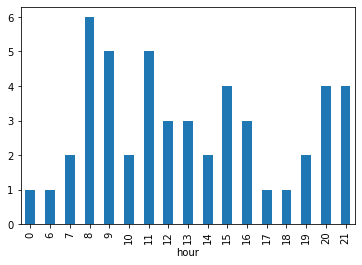

In [ ]:
df['hour'] = df['date_time'].apply(lambda x: x.hour)
df[df['user']=='Susan'].groupby(['hour']).size().sort_index().plot(x="hour", kind='bar')

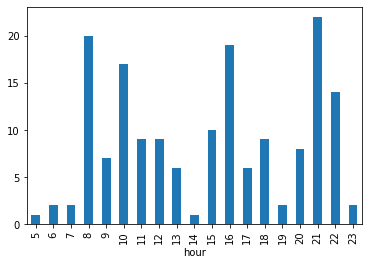

In [ ]:
df['hour'] = df['date_time'].apply(lambda x: x.hour)
df[df['user']=='Coùprere'].groupby(['hour']).size().sort_index().plot(x="hour", kind='bar')

# How many words do each user type on average on weekday vs weekend?

Q 4)
What is the difference in Weekend vs Weekday usage pattern?

How many words do each user type on average on weekday vs weekend?

In [ ]:
df['weekday'] = df['date_time'].apply(lambda x: x.day_name()) # can use day_name or weekday from datetime 

In [ ]:
df['is_weekend'] = df.weekday.isin(['Sunday', 'Saturday'])

In [ ]:
msgs_per_user = df['user'].value_counts(sort=True)
msgs_per_user

Matata             1402
Phee                369
+254 759 645300     355
+254 799 318462     213
joram               201
                   ... 
+254 742 444901       3
+254 706 991017       2
Kim                   2
Phineas               1
+254 717 575474       1
Name: user, Length: 119, dtype: int64

In [ ]:
top5_users = msgs_per_user.index.tolist()[:5]
top5_users

['Matata', 'Phee', '+254 759 645300', '+254 799 318462', 'joram']

In [ ]:
df_top5 = df.copy()
df_top5 = df_top5[df_top5.user.isin(top5_users)]
df_top5.head()

,date_time,user,msg,hour,weekday,is_weekend
1,2021-09-30 08:20:00,Matata,Jioni tko na Daru ya Magero,8,Thursday,False
2,2021-09-30 08:20:00,Matata,Physical,8,Thursday,False
4,2021-09-30 08:44:00,Matata,Jioni,8,Thursday,False
11,2021-09-30 09:12:00,Matata,"Moja, Io ya jioni",9,Thursday,False
22,2021-09-30 14:56:00,Phee,Na hauko shule ata🚮🚮😅😅,14,Thursday,False


# Which are the most common words?

**Which are the most common words?**

In [ ]:
comment_words = ' '
stopwords = STOPWORDS.update(['sawa', 'basi', 'okay', 'hello guys', 'from', 'HBD', 'happy birthday', 'Blues', 'yeah', 'yoh', 'will', 'W132', 'ok', 'will'])
  
for val in df.msg.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# Word Cloud of the most common Words


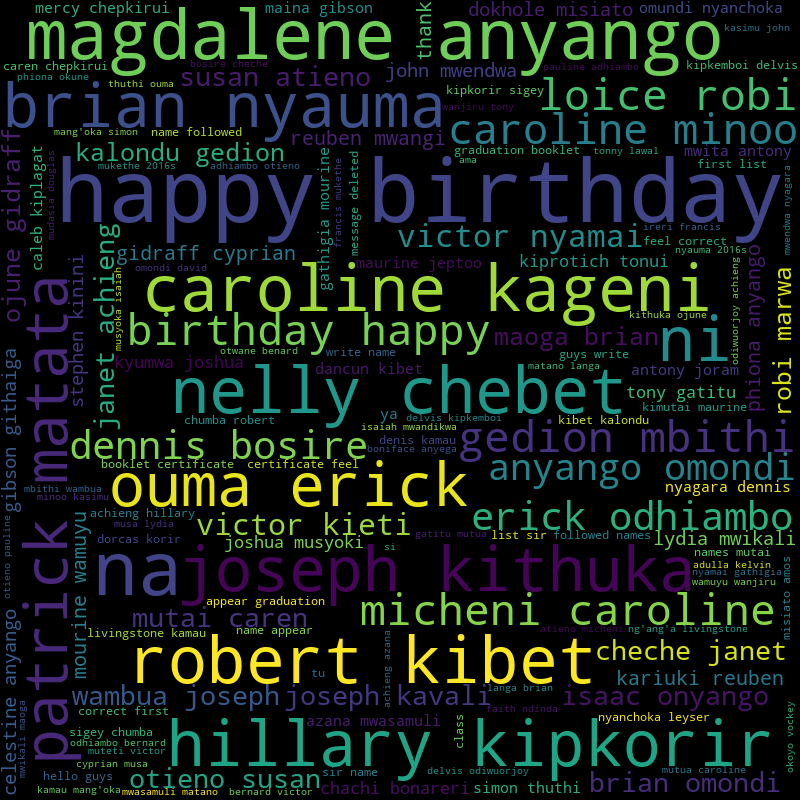

In [ ]:
wordcloud.to_image()